### Plotting PTMs in Comet and PEAKS results using python for *Prochlococcus* MED4 benchmark study

Starting with:

    Peaks de novo results (.csv) of PTM-optimized sequencing
    Comet results from PTM-optimized database searches
    PeaksDB (de novo-assisted database searching) results of PTM-optimzed searching

Goal:

    Figures comparing the modifcation type and extent in database and de novo peptides
    
Using:

    - pandas
    - matplotlib

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

### Non NAAF-corrected PTMs and AAs

In [2]:
# read in csvs made in MED4-PeaksDB and MED4-Comet notebooks
# bringing in Comet > XCorr 2.17 (will say 3) and 2.5 and de novo peptides > 50% ALC and >80% ALC
# also reading in Peaks DB peptides >20 -10lgP

#peaks50 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDN/RAL95_MED2_trypsin_combine_PTMopt_DN50_totals.csv")
peaks80 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDN/RAL95_MED2_trypsin_combine_PTMopt_DN80_totals.csv")
#comet25 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL95_MED2_trypsin_combine_cometpmm25_totals.csv")
comet3 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL95_MED2_trypsin_combine_Comet15_2.17XCorr_totals.csv")
peaksdb = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDB/RAL95_MED2_trypsin_combine_PeaksDB20_totals.csv")

frames = [peaks80, comet3, peaksdb]
#frames = [peaks50, peaks80, comet25, comet3, peaksdb]
index = ['peaks80', 'comet3', 'peaksdb']
#index = ['peaks80','comet3', 'peaksdb']

# concatenate dataframes
tot = pd.concat(frames, sort=False, ignore_index=True)

# there's a useless column in there
tot = tot.loc[:, ~tot.columns.str.contains('^Unnamed')]

# reindex with peaks and comet
names = ['peaks80', 'comet3', 'peaksdb']
#names = ['peaks80', 'comet3', 'peaksdb']
tot.insert(loc=0, column='data source', value=names)
tot.set_index('data source')

# separate out the dataframe into AAs and %PTMs, too
AA = tot[['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']].copy()

# no C since it's the same #ptm = tot[['% C w/ carb.', '% M w/ oxid', '% N w/ deam', '% Q w/ deam', '% K w/ iron', '% K w/ meth', '% R w/ meth']].copy()
ptm = tot[['data source', '% M w/ oxid', '% N w/ deam', '% Q w/ deam', '% K w/ meth', '% R w/ meth']].copy()

#ptm['total modified'] = tot['% M w/ oxid'] + tot['% N w/ deam'] + tot['% Q w/ deam'] + tot['% K w/ iron'] + tot['% K w/ meth'] + tot['% R w/ meth']

# rename columns because they're not actually percentages
ptm.columns = ['data source', 'Met. w/ oxid.', 'Asn. w/ deam.', 'Gln. w/ deam.', 'Lys. w/ meth.', 'Arg. w/ meth.']

ptm.head()

,data source,Met. w/ oxid.,Asn. w/ deam.,Gln. w/ deam.,Lys. w/ meth.,Arg. w/ meth.
0,peaks80,0.460793,0.220428,0.057168,0.039386,0.203812
1,comet3,0.336020,0.043296,0.050598,0.000544,0.000375
2,peaksdb,0.331142,0.014329,0.013680,0.001585,0.001530


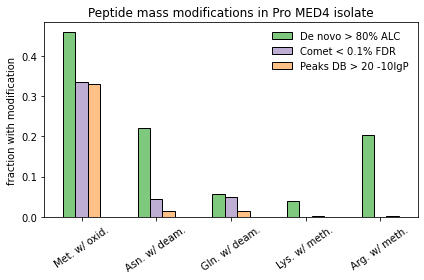

In [3]:
# plot mods

ptmds = ptm.drop(['data source'], axis=1)

ptmT = ptmds.T

ptmT.columns = ['De novo > 80% ALC', 'Comet < 0.1% FDR', 'Peaks DB > 20 -10lgP']
#ptmT.columns = ['Peaks > 50 % ALC', 'Peaks > 80% ALC', 'Comet > XCorr 2.5', 'Comet > XCorr 3.0', 'Peaks DB > 20 -10lgP']

#x_labels = ['Peaks 50 % ALC', 'Peaks 80% ALC', 'Comet XCorr 2.5', 'Comet > XCorr 3.0', 'Peaks DB > 20 -10lgP']

six_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598', '#99d594', '#3288bd']
six_colors_q = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f']
seven_colors = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']

ax = ptmT.iloc[0:6].plot(kind="bar", title = 'Peptide mass modifications in Pro MED4 isolate', color = seven_colors, edgecolor = 'black')
plt.xticks(rotation=35)
#ax.get_legend().remove()

ax.set_ylabel('fraction with modification')
#ax.set_xlabel('mass modification type')
legend = plt.legend()
legend.get_frame().set_edgecolor('1.0')

plt.tight_layout()

plt.savefig("/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pronovo-2020-ptm/MED4_Abs_PTM")

# also save in latex manuscript dir
plt.savefig("/home/millieginty/Documents/med-manuscripts/de-novo-etnp/rewrite-may2020/AGU/MED-AGU/MED4_Abs_PTM", dpi = 300)

### NAAF corrected PTMS and AAs

In [7]:
# read in csvs made in MED4-PeaksDN, MED4-PeaksDB and MED4-Comet notebooks NAAF corrected totals
# bringing in Comet > XCorr 3, de novo peptides >80% ALC
# also reading in Peaks DB peptides >20 -logP

peaks80 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDN/RAL95_MED2_trypsin_combine_DN80_NAAF_totals.csv")
comet3 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL95_MED2_trypsin_combine_Comet15_2.17XCorr_NAAF_totals.csv")
peaksdb = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDB/RAL95_MED2_trypsin_combine_PeaksDB20_NAAF_totals.csv")

frames = [peaks80, comet3, peaksdb]
index = ['peaks80', 'comet3', 'peaksdb']

# concatenate dataframes
NAAFtot = pd.concat(frames, sort=False, ignore_index=True)

# there's a useless column in there
NAAFtot = NAAFtot.loc[:, ~NAAFtot.columns.str.contains('^Unnamed')]

# reindex with peaks and comet
names = ['peaks80', 'comet3', 'peaksdb']
NAAFtot.insert(loc=0, column='data source', value=names)
NAAFtot.set_index('data source')

# separate out the dataframe into AAs and %PTMs, too
NAAF_AA = NAAFtot[['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']].copy()

# get NAAF-corrected AA abundance (mol frac.)
# sum all the AAs in each dataset, making a new column

NAAFtot['AA-Total'] = NAAFtot['A'] + NAAFtot['C'] + NAAFtot['D'] + NAAFtot['E'] \
+ NAAFtot['F'] + NAAFtot['G'] + NAAFtot['H'] + NAAFtot['I'] + NAAFtot['K'] + NAAFtot['L'] \
+ NAAFtot['M'] + NAAFtot['N'] + NAAFtot['P'] + NAAFtot['Q'] + NAAFtot['R'] \
+ NAAFtot['S'] + NAAFtot['T'] + NAAFtot['V'] + NAAFtot['W'] + NAAFtot['Y'] 

# calculate the relative (NAAF-normalized) AA composition (fractions of AA total for each dataset)

NAAFtot['A_RelNAAF'] = NAAFtot['A']/NAAFtot['AA-Total']  #A
NAAFtot['C_RelNAAF'] = NAAFtot['C']/NAAFtot['AA-Total']  #C
NAAFtot['D_RelNAAF'] = NAAFtot['D']/NAAFtot['AA-Total']  #D
NAAFtot['E_RelNAAF'] = NAAFtot['E']/NAAFtot['AA-Total']  #E
NAAFtot['F_RelNAAF'] = NAAFtot['F']/NAAFtot['AA-Total']  #F
NAAFtot['G_RelNAAF'] = NAAFtot['G']/NAAFtot['AA-Total']  #G
NAAFtot['H_RelNAAF'] = NAAFtot['H']/NAAFtot['AA-Total']  #H
NAAFtot['I_RelNAAF'] = NAAFtot['I']/NAAFtot['AA-Total']  #I
NAAFtot['K_RelNAAF'] = NAAFtot['K']/NAAFtot['AA-Total']  #K
NAAFtot['L_RelNAAF'] = NAAFtot['L']/NAAFtot['AA-Total']  #L
NAAFtot['M_RelNAAF'] = NAAFtot['M']/NAAFtot['AA-Total']  #M
NAAFtot['N_RelNAAF'] = NAAFtot['N']/NAAFtot['AA-Total']  #N
NAAFtot['P_RelNAAF'] = NAAFtot['P']/NAAFtot['AA-Total']  #P
NAAFtot['Q_RelNAAF'] = NAAFtot['Q']/NAAFtot['AA-Total']  #Q
NAAFtot['R_RelNAAF'] = NAAFtot['R']/NAAFtot['AA-Total']  #R
NAAFtot['S_RelNAAF'] = NAAFtot['S']/NAAFtot['AA-Total']  #S
NAAFtot['T_RelNAAF'] = NAAFtot['T']/NAAFtot['AA-Total']  #T
NAAFtot['V_RelNAAF'] = NAAFtot['V']/NAAFtot['AA-Total']  #V
NAAFtot['W_RelNAAF'] = NAAFtot['W']/NAAFtot['AA-Total']  #W
NAAFtot['Y_RelNAAF'] = NAAFtot['Y']/NAAFtot['AA-Total']  #Y

# calculate a NAAF-corrected weigted average of residue modification 
# fraction of residue X that's modified, corrected by overall (mofified and unmodified) abundance of X
# added up for the five affected residues

NAAFtot['PercentMod_RelNAAF'] = NAAFtot['% M w/ oxid'] * NAAFtot['M_RelNAAF'] + \
                                NAAFtot['% N w/ deam'] * NAAFtot['N_RelNAAF'] + \
                                NAAFtot['% Q w/ deam'] * NAAFtot['Q_RelNAAF'] + \
                                NAAFtot['% K w/ meth'] * NAAFtot['K_RelNAAF'] + \
                                NAAFtot['% R w/ meth'] * NAAFtot['R_RelNAAF'] 

# also adding up NAAF corrected %res w/ mods divided by maximum additive frac modified (for five mods, it's 5)
#NAAFtot['Overall % w/ mod'] = (NAAFtot['% M w/ oxid'] + NAAFtot['% N w/ deam'] + NAAFtot['% Q w/ deam'] + NAAFtot['% K w/ meth'] + NAAFtot['% R w/ meth']) / 5
                
# no C since it's the same. Also jettisonning Fe mod b/c not sure about it and its so negligable in NAAF form
NAAF_ptm = NAAFtot[['data source', '% M w/ oxid', '% N w/ deam', '% Q w/ deam', '% K w/ meth', '% R w/ meth']].copy()

# rename columns because they're not actually percentages
NAAF_ptm.columns = ['data source', 'Met. w/ oxid.', 'Asn. w/ deam.', 'Gln. w/ deam.', 'Lys. w/ meth.', 'Arg. w/ meth.']

NAAFtot.head()

,data source,NAAF,A,C,D,E,F,G,H,I,...,N_RelNAAF,P_RelNAAF,Q_RelNAAF,R_RelNAAF,S_RelNAAF,T_RelNAAF,V_RelNAAF,W_RelNAAF,Y_RelNAAF,PercentMod_RelNAAF
0,peaks80,14551.614829,12678.560160,1670.539589,5886.210070,12435.788435,4585.758789,9747.182863,1131.875179,0.000000,...,0.055855,0.042375,0.031240,0.049426,0.063248,0.063480,0.088392,0.008328,0.022979,0.047621
1,comet3,23247.130280,34054.172120,2310.131634,23729.409712,31390.643647,10655.535941,32470.464761,3390.209699,27106.632660,...,0.042468,0.044514,0.025837,0.039654,0.055644,0.053630,0.071284,0.003212,0.019668,0.002788
2,peaksdb,25193.960905,28763.283575,1905.970892,18240.696235,24960.439070,10627.333458,27098.447690,2559.598147,24848.622941,...,0.048779,0.051874,0.031181,0.030643,0.059174,0.057807,0.082105,0.004763,0.022334,0.001760


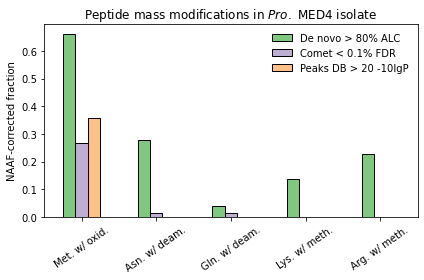

In [8]:
# plot mods

ptmds = NAAF_ptm.drop(['data source'], axis=1)

ptmT = ptmds.T

ptmT.columns = ['De novo > 80% ALC', 'Comet < 0.1% FDR', 'Peaks DB > 20 -10lgP']

#x_labels = ['Peaks 50 % ALC', 'Peaks 80% ALC', 'Comet XCorr 2.5', 'Comet > XCorr 3.0', 'Peaks DB > 20 -10lgP']

six_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598', '#99d594', '#3288bd']
six_colors_q = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f']
seven_colors = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']

ax = ptmT.iloc[0:6].plot(kind="bar", title = 'Peptide mass modifications in $Pro.$ MED4 isolate', color = seven_colors, edgecolor = 'black')
plt.xticks(rotation=35)
#ax.get_legend().remove()

ax.set_ylabel('NAAF-corrected fraction')
#ax.set_xlabel('mass modification type')
legend = plt.legend()
legend.get_frame().set_edgecolor('1.0')

plt.tight_layout()

plt.savefig("/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pronovo-2020-ptm/MED4_NAAF_PTM")

# also save in latex manuscript dir
plt.savefig("/home/millieginty/Documents/git-repos/denovo-etnp/MED4_NAAF_PTM", dpi = 300)

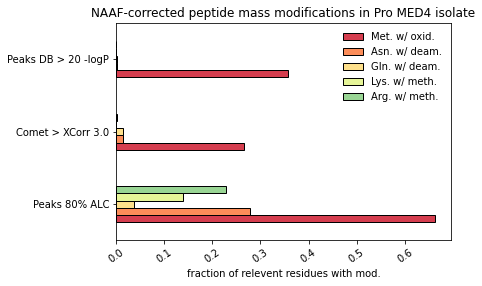

In [9]:
# horizontal bar plot of relative modifications

y_labels = ['Peaks 80% ALC', 'Comet > XCorr 3.0', 'Peaks DB > 20 -logP']

six_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598', '#99d594', '#3288bd']

ax = NAAF_ptm.plot(kind="barh", title = 'NAAF-corrected peptide mass modifications in Pro MED4 isolate', color = six_colors, edgecolor = 'black')
plt.xticks(rotation=35)
#ax.get_legend().remove()
ax.set_yticklabels(y_labels)
ax.set_xlabel('fraction of relevent residues with mod.')
legend = plt.legend()
legend.get_frame().set_edgecolor('1.0')